# Regression

Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

Importing dataset

In [ ]:
dataset = pd.read_csv('data.csv', header = None)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

Plot the data (just for visualization)

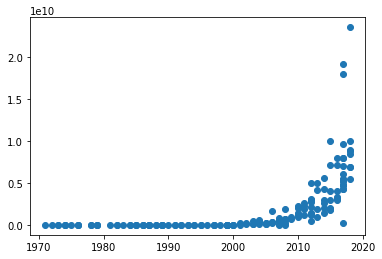

In [3]:
plt.scatter(X, y)
plt.show()

Plotting X and log(y)

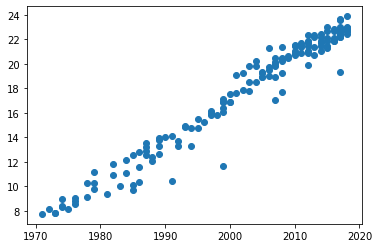

In [4]:
y = np.log(y)
plt.scatter(X, y)
plt.show()

Dealing with missing values

In [5]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X)
X = imputer.transform(X)

Scaling the data

In [6]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = np.reshape(y, (-1, 1))
y = sc_y.fit_transform(y)

Splitting data into train and test sets

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
N, D = X_train.shape

Fitting model on training data

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape = (D, )))
model.add(tf.keras.layers.Dense(1))

model.compile(optimizer = tf.keras.optimizers.SGD(0.001, 0.9), loss = 'mse')

# Learning rate scheduler
def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

r = model.fit(X_train, y_train, epochs = 200, callbacks = [scheduler])

Plotting what's returned by model.fit

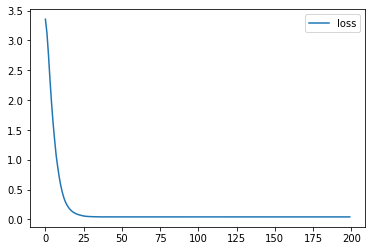

In [9]:
plt.plot(r.history['loss'], label = 'loss')
plt.legend()

Making predictions

In [10]:
y_pred = model.predict(X_test)

Visualizing Training set data

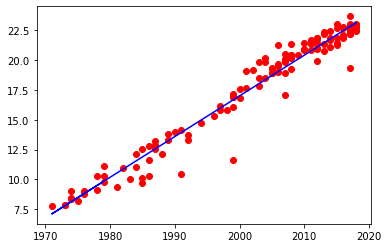

In [11]:
plt.scatter(sc_X.inverse_transform(X_train), sc_y.inverse_transform(y_train), color = 'red')
plt.plot(sc_X.inverse_transform(X_train), sc_y.inverse_transform(model.predict(X_train)), color = 'blue')
plt.show()

Visualizing Test set data

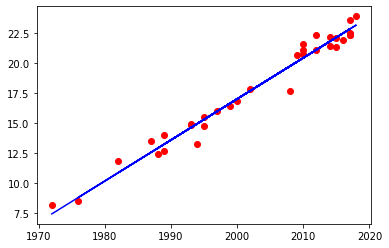

In [12]:
plt.scatter(sc_X.inverse_transform(X_test), sc_y.inverse_transform(y_test), color = 'red')
plt.plot(sc_X.inverse_transform(X_test), sc_y.inverse_transform(y_pred), color = 'blue')
plt.show()